In [1]:
from tqdm import tqdm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import itertools
import ipywidgets as widgets
from IPython.display import display

In [3]:
np.random.seed(1)

# Distribution parameters
mean_a, std_a = 0.5, 1
mean_b, std_b = 0.0, 1

# Domain of alpha values to test
# Testing num values of (alpha_min - alpha_max) / num
alpha_min, alpha_max = 0, 1
alphas = np.linspace(alpha_min, alpha_max, num=101)

# Sample size of each distribution
# originally 75, changed to 150 for better distribution
sample_size = 75

# Generate samples from normal distributions
a = np.random.normal(mean_a, std_a, sample_size)
b = np.random.normal(mean_b, std_b, sample_size)

#Step Parameters
# U+ / U- > C+ / C-
u_plus = 1
u_minus = -1.1
c_plus = 1
c_minus = -c_plus
range = (-3, 3)
interval = 0.1

# 5:38 for interval = 0.01

In [4]:
from utils import opt_threshold, alt_fair_opt_step

# Store results
x1 = []
fair_mean_A = []
fair_mean_B = []
fair_threshold_A = []
fair_threshold_B = []
total_util = []


y6 = opt_threshold((-3, 3), u_plus=1, u_minus=-1.1)

# Run fair optimization over a range of alpha values
for alpha in tqdm(alphas):
    results = alt_fair_opt_step(a, b, u_plus, u_minus, c_plus, c_minus, alpha, range, interval)
    if results[0] is not None and results[1] is not None:
        a, b, thresh_A, thresh_B, max_util = results
        x1.append(alpha)
        
        fair_mean_A.append(np.mean(a))
        fair_mean_B.append(np.mean(b))
        fair_threshold_A.append(thresh_A)
        fair_threshold_B.append(thresh_B)
        total_util.append(max_util)

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:03<00:00, 27.67it/s]


In [ ]:
'''w_a = len(a) / (len(a) + len(b))
w_b = 1 - w_a
from utils import expected
delta_A = expected(a, c_plus, c_minus)
delta_B = expected(b, c_plus, c_minus)

thresholds = np.arange(range[0], range[1], interval)
for threshold_A in thresholds:
        for threshold_B in thresholds:
            a = np.where(a + delta_A > threshold_A, a + delta_A, a )
            b = np.where(b + delta_B > threshold_B, b + delta_B, b )
            if np.abs( np.mean(a) - np.mean(b) ) > alpha:
                continue
            util = w_a * np.sum(expected(a, u_plus, u_minus)) + w_b * np.sum(expected(b, u_plus, u_minus))
            max_util = util
            opt_A = a
            opt_B = b
            thresh_A = threshold_A
            thresh_B = threshold_B
            break
print(f"Optimal Threshold A: {thresh_A}, Optimal Threshold B: {thresh_B}")'''

Optimal Threshold A: -3.0, Optimal Threshold B: 2.6645352591003757e-15


In [5]:
def plot_fairness(show_means=True, show_fair_thresholds=True, show_opt_thresholds=True, show_utility=True):
    plt.figure(figsize=(10, 6))

    if show_means:
        plt.plot(0, mean_a, 'ro', label='Initial μ(A)')
        plt.plot(0, mean_b, 'bo', label='Initial μ(B)')
        plt.plot(x1, fair_mean_A, label="Fair μ(A)'", color='red')
        plt.plot(x1, fair_mean_B, label="Fair μ(B)'", color='blue') 

    if show_fair_thresholds:
        plt.scatter(x1, fair_threshold_A, label="Fair Threshold (A)", color='orange')
        plt.plot(x1, fair_threshold_B, label="Fair Threshold (B)", color='purple')
    
    if show_opt_thresholds:
        plt.axhline(y6, color='purple', linestyle='--', label='Optimal Threshold')

    if show_utility:
        plt.plot(x1, total_util, label='Total Utility', color='green')

    plt.title("Fair vs. Optimal Means under Varying Fairness Constraint α")
    plt.xlabel("α (Fairness Threshold)")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Toggle widgets
means_toggle = widgets.Checkbox(value=False, description='Show Means')
fair_thresholds_toggle = widgets.Checkbox(value=True, description='Show Fair Thresholds')
opt_thresholds_toggle = widgets.Checkbox(value=False, description='Show Optimal Threshold')
utility_toggle = widgets.Checkbox(value=False, description='Show Utility')

ui = widgets.HBox([means_toggle, fair_thresholds_toggle, opt_thresholds_toggle, utility_toggle])
out = widgets.interactive_output(plot_fairness, {
    'show_means': means_toggle,
    'show_fair_thresholds': fair_thresholds_toggle,
    'show_opt_thresholds': opt_thresholds_toggle,
    'show_utility': utility_toggle,
})

display(ui, out)

Output()

In [189]:
''''
print(y6)
results = alt_fair_opt_step(pop_A=a, pop_B=b, u_plus=1, u_minus=-1, c_plus=1, c_minus=-1, alpha=0.5, range_param=(-3, 3), size=0.01)
from utils import alt_fair_step
l = alt_fair_step(a, b, 1, -1, 1, -1, 0.5, (-3, 3), 0.01)

print(np.sum(results[0] + results[1]))
print(np.sum(l[0] + l[1]))
'''
print(alphas)
print(np.arange(range[0], range[1], interval))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-0

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:00<00:00, 5394.72it/s]

[]


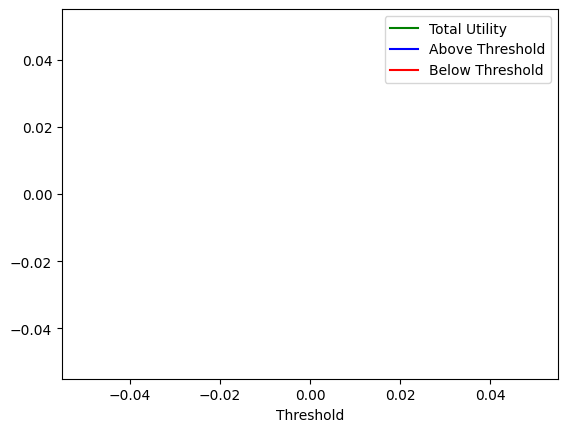

In [190]:
from utils import opt_step, alt_fair_opt_step, expected

# Create a range of thresholds
thresholds = np.arange(range[0], range[1], interval)

# Store x and y
x1 = []
total_util = []
above = []
below = []
unfair = []
'''
max_util = -np.inf
for i in thresholds:
    B = np.where(b > i, b + expected(b, c_plus, c_minus), b)
    util = np.sum(expected(B, u_plus, u_minus))
    if  util > max_util:
        max_util = util
        opt_thresh = i

print(f"{opt_thresh}, {fair_threshold_B[-1]}")
print(opt_thresh - fair_threshold_B[-1])'''
opt_thresh = fair_threshold_B[-1]

delta_A = expected(a, c_plus, c_minus)
delta_B = expected(b, c_plus, c_minus)
b = np.where(b > opt_thresh, b + delta_B, b)
util_B = np.sum(expected(b, u_plus, u_minus))

for threshold in tqdm(thresholds):
    alpha = 0.55 # Fixed alpha value for this run
    a = np.where(a > threshold, a + delta_A, a)
    if np.abs(np.mean(a) - np.mean(b)) > alpha:
        unfair.append(threshold)
        continue
    utility = np.sum(expected(a, u_plus, u_minus)) + util_B
    above.append(len(np.where(a > threshold)[0]))
    below.append(len(np.where(a <= threshold)[0]))
    total_util.append(utility)
    x1.append(threshold)

plt.plot(x1, total_util, label='Total Utility', color='green')
plt.plot(x1, above, label='Above Threshold', color='blue')
plt.plot(x1, below, label='Below Threshold', color='red')

plt.legend()
plt.xlabel('Threshold')

print(total_util)


100%|██████████| 60/60 [00:00<00:00, 19906.52it/s]


Text(0, 0.5, 'Mean Difference')

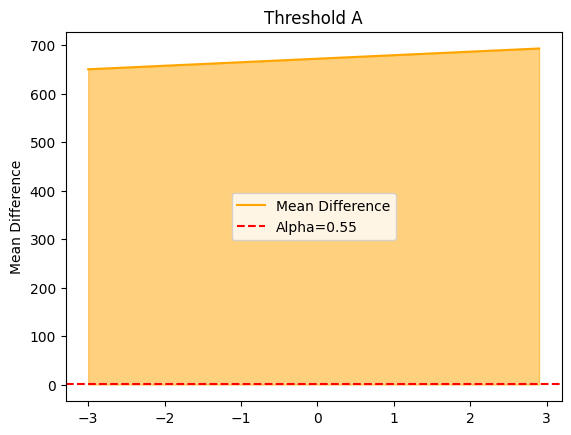

In [191]:
# Store x and y
x2 = []
y2 = []

#opt_thresh = 1
b = np.where(b > opt_thresh, b + delta_B, b)

for threshold in tqdm(thresholds):
    a = np.where(a > threshold, a + delta_A, a)
    x2.append(threshold)
    y2.append(np.abs(np.mean(a) - np.mean(b)))

plt.plot(x2, y2, label='Mean Difference', color='orange')
plt.axhline(alpha, color='red', linestyle='--', label=f'Alpha={alpha}')
plt.fill_between(x2, y2, alpha, where=(np.array(y2) > alpha), interpolate=True, color='orange', alpha=0.5)

plt.legend()
plt.title("Threshold A")
plt.ylabel('Mean Difference')
